In [2]:
import pandas as pd
import numpy as np
from funciones import *
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime as dt

In [7]:
pd.set_option('display.max_columns', None)   # mostrar todas las columnas del df
pd.set_option('display.max_rows', None)   # mostrar todas las filas del df

## CARGA DE INFORMACiÓN

In [ ]:
'''
la inforamción que se ha descargado de la web del portal de datos de Madrid corresponde a dos tipos de datos diferentes.

Por un lado tenemos la situación de las estaciones por hora

Y por otro lado los trayectos realizados (salida entrada de bici)

La nformación viene dividida en archivos por cada mes 
se creo una función que lee cada tipo de archivo json y lo trasnforma en un dataframe
y otra función que recorre un directorio para cargar y juntar cada archivo en un solo dataset

'''

In [3]:
# tabla con información de las estaciones

estaciones = pd.read_csv(r'../data_raw/bases/bases_bicimad.csv', sep=';' )



In [4]:
# dataset con la informacion de la situacion por horas de cada estacion

dir = r'C:\Users\aaron\AAROON\IRONHACK_BOOTCAMP_DATA\8_PROYECTO_FINAL\biciMAD_analysis\data_raw\conjunto_estaticos'

estatic =  agrupa_data(dir, conjunto_estaticos)

In [5]:
# dataset con la informacion de la situacion por horas de los trayectos

dir = r'C:\Users\aaron\AAROON\IRONHACK_BOOTCAMP_DATA\8_PROYECTO_FINAL\biciMAD_analysis\data_raw\conjunto_itinerarios'

itiner =  agrupa_data(dir, conjunto_itinerarios)

## EXPLORACIÓN INFO

In [6]:
estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Número            269 non-null    object 
 1   Gis_X             269 non-null    object 
 2   Gis_Y             269 non-null    object 
 3   Fecha de Alta     269 non-null    int64  
 4   Distrito          269 non-null    object 
 5   Barrio            269 non-null    object 
 6   Calle             269 non-null    object 
 7   Nº Finca          269 non-null    object 
 8   Tipo de Reserva   269 non-null    object 
 9   Número de Plazas  269 non-null    int64  
 10  Longitud          269 non-null    float64
 11  Latitud           269 non-null    float64
 12  Direccion         269 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 27.4+ KB


In [7]:
itiner.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code
0,5ee862cecc8c1e839b419387,509e6a72b7673f533912bf647d20df19305b848fbc1b89...,5,1,20,154,44,5,40,2019-07-01T00:00:00Z,28007
1,5ee862cecc8c1e839b41938c,90069a1194c3eb9e6faecaaf4eefb7209e890c0df5aeac...,8,1,17,184,57,4,129,2019-07-01T00:00:00Z,28045
2,5ee862cecc8c1e839b419394,b0ecaab6a35b7ea44d118f851f7fad5c2237e7dd51b337...,15,1,16,282,53,4,43,2019-07-01T00:00:00Z,
3,5ee862cecc8c1e839b41939e,5e1b8a8c4603ee8ac4f06aba12ff51e2c5dd105b6e5193...,18,1,18,388,56,0,13,2019-07-01T00:00:00Z,
4,5ee862cecc8c1e839b4193a5,80974c4043db61721399c43f296ce1db4436c7f107f8fc...,1,1,20,254,105,0,75,2019-07-01T00:00:00Z,


In [8]:
itiner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159891 entries, 0 to 413369
Data columns (total 11 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   _id               object
 1   user_day_code     object
 2   idplug_base       int64 
 3   user_type         int64 
 4   idunplug_base     int64 
 5   travel_time       int64 
 6   idunplug_station  int64 
 7   ageRange          int64 
 8   idplug_station    int64 
 9   unplug_hourTime   object
 10  zip_code          object
dtypes: int64(7), object(4)
memory usage: 655.5+ MB


In [9]:
estatic.head()

,_id,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,id
0,2019-07-01T00:29:26.018083,1,Puerta del Sol A,0,2,24,15,1a,-3.7024255,0,Puerta del Sol nº 1,40.4168961,8,1
1,2019-07-01T00:29:26.018083,1,Puerta del Sol B,0,2,24,14,1b,-3.7024207,0,Puerta del Sol nº 1,40.4170009,9,2
2,2019-07-01T00:29:26.018083,1,Miguel Moya,0,2,24,12,2,-3.7058415,0,Calle Miguel Moya nº 1,40.4205886,10,3
3,2019-07-01T00:29:26.018083,1,Plaza Conde Suchil,0,1,18,4,3,-3.7069171,0,Plaza del Conde Suchil nº 2-4,40.4302937,11,4
4,2019-07-01T00:29:26.018083,1,Malasaña,0,0,24,17,4,-3.7025875,0,Calle Manuela Malasaña nº 5,40.4285524,3,5


In [10]:
estatic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3923271 entries, 0 to 187967
Data columns (total 14 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   _id                 object
 1   activate            int64 
 2   name                object
 3   reservations_count  int64 
 4   light               int64 
 5   total_bases         int64 
 6   free_bases          int64 
 7   number              object
 8   longitude           object
 9   no_available        int64 
 10  address             object
 11  latitude            object
 12  dock_bikes          int64 
 13  id                  int64 
dtypes: int64(8), object(6)
memory usage: 449.0+ MB


In [11]:
estatic.isnull().values.any()

False

In [12]:
itiner.isnull().values.any()

False

In [ ]:
'''
En un primer vistazo comprobamos que no hay nulos y vemos que en la tabla static hay cosas como texto que deberían ser números
como la Longitud y latitud

'''

como primer objetivo vamos a construir una tabla que alamcene la información de las estaciones

In [13]:
estaciones.head()

,Número,Gis_X,Gis_Y,Fecha de Alta,Distrito,Barrio,Calle,Nº Finca,Tipo de Reserva,Número de Plazas,Longitud,Latitud,Direccion
0,001 a,"440443,61","4474290,65",43803,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",2,BiciMAD,30,-3.701998,40.417111,"ALCALA, CALLE, DE, 2"
1,001 b,"440480,56","4474301,74",43867,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",6,BiciMAD,30,-3.701564,40.417213,"ALCALA, CALLE, DE, 6"
2,2,"440134,83","4474678,23",41813,01 CENTRO,01-05 UNIVERSIDAD,"MIGUEL MOYA, CALLE, DE",1,BiciMAD,24,-3.705674,40.420580,"MIGUEL MOYA, CALLE, DE, 1"
3,3,"440012,98","4475760,68",41813,07 CHAMBERÍ,07-02 ARAPILES,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL",2,BiciMAD,18,-3.707212,40.430322,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL, 2"
4,4,"440396,4","4475565,36",41813,01 CENTRO,01-05 UNIVERSIDAD,"MANUELA MALASAÑA, CALLE, DE",3,BiciMAD,24,-3.702674,40.428590,"MANUELA MALASAÑA, CALLE, DE, 3"


In [14]:
estaciones['Número']= estaciones['Número'].str.replace('001', '1')
estaciones['Número']= estaciones['Número'].str.replace('025', '25')
estaciones['Número']= estaciones['Número'].str.replace('080', '80')

estaciones['Número']= estaciones['Número'].str.replace(' ', '')


In [15]:
e = estatic[['id', 'number']].groupby(['id', 'number']).count().reset_index()
e.head()

,id,number
0,1,1a
1,2,1b
2,3,2
3,4,3
4,5,4


In [16]:
e.set_index('number').join(estaciones[['Número', 'Direccion']].set_index('Número'), how = 'outer').head()

,id,Direccion
020ampliacion,NaN,"ALCALA, CALLE, DE, 49"
090ampliacion,NaN,"GOYA, CALLE, DE, 20"
10,11.0,"MARQUES DE LA ENSENADA, CALLE, DEL, 16"
100,105.0,"GOYA, CALLE, DE, 99"
101,106.0,"JORGE JUAN, CALLE, DE, 131"


In [ ]:
'''
la tabla estaciones no nos sirve como tabla. 
Porque no tiene los id que se utilizan en las tablas itner y estatic, además flatan algunas estaciones 

'''

se va a generar una tabla estaciones a partir de los datos de la tabla esttatic

In [17]:
estaciones1 = estatic[['id','number', 'name', 'longitude', 'latitude', 'address', 'total_bases']].groupby(['id','number', 'name', 'longitude', 'latitude', 'address', 'total_bases']).count().reset_index()
estaciones1.head()

,id,number,name,longitude,latitude,address,total_bases
0,1,1a,Madrid Sol 1A,-3.7024255,40.4168961,Puerta del Sol nº 1,24
1,1,1a,Puerta del Sol A,-3.70178074,40.41715281,Puerta del Sol nº 1,30
2,1,1a,Puerta del Sol A,-3.7018341,40.4172137,Puerta del Sol nº 1,30
3,1,1a,Puerta del Sol A,-3.7024255,40.4168961,Puerta del Sol nº 1,24
4,1,1a,Puerta del Sol A,-3.7024255,40.4168961,Puerta del Sol nº 1,30


In [ ]:
'''
no todas las estaciones contiene la información del mismo modo varía la coordenada el texto del nombre... además hay coordenadas
que están mal.

con cuidado y revisando cada cambio, quitando información incorrecta, y finalmente agrupando la inforamción obtenemos la tabla 
de estaciones
'''

In [18]:
estaciones1.drop(estaciones1[estaciones1['latitude'] == '---'].index, inplace = True)

In [19]:
# quita filas por indice

estaciones1.drop([0,1,5, 6, 13, 20, 59, 60, 233], inplace = True)

In [20]:
estaciones1 = estaciones1.groupby(['id','number']).agg({'name': 'max', 'longitude': 'max', 'latitude': 'max', 'address': 'max', 'total_bases': 'max'}).reset_index()

In [21]:
estaciones1.head()

,id,number,name,longitude,latitude,address,total_bases
0,1,1a,Puerta del Sol A,-3.7024255,40.4172137,Puerta del Sol nº 1,30
1,2,1b,Puerta del Sol B,-3.7024207,40.4170009,Puerta del Sol nº 1,30
2,3,2,Miguel Moya,-3.7058415,40.4205886,Calle Miguel Moya nº 1,24
3,4,3,Plaza Conde Suchil,-3.7069171,40.4302937,Plaza del Conde del Valle de Súchil nº 3,18
4,5,4,Malasaña,-3.7025875,40.4285524,Calle Manuela Malasaña nº 5,24


In [22]:
len(estaciones1)

266

In [ ]:
'''
ya tenemos todas las estaciones en un dataFrame, como tiene coordendas vamos a darle una componente geográfica
'''

In [23]:
estaciones1.to_csv(r'..\data\estaciones.csv', index=False, encoding = 'utf-8')  

In [98]:
estaciones1 = pd.read_csv(r'..\data\\estatic.csv')

C:\Users\aaron\AppData\Local\Temp\ipykernel_15404\3490366882.py:1: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  estaciones1 = pd.read_csv(r'..\data\\estatic.csv')


In [99]:
estaciones1.head()

,_id,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,id
0,2019-07-01T00:29:26.018083,1,Puerta del Sol A,0,2,24,15,1a,-3.702425,0,Puerta del Sol nº 1,40.416896,8,1
1,2019-07-01T00:29:26.018083,1,Puerta del Sol B,0,2,24,14,1b,-3.702421,0,Puerta del Sol nº 1,40.417001,9,2
2,2019-07-01T00:29:26.018083,1,Miguel Moya,0,2,24,12,2,-3.705842,0,Calle Miguel Moya nº 1,40.420589,10,3
3,2019-07-01T00:29:26.018083,1,Plaza Conde Suchil,0,1,18,4,3,-3.706917,0,Plaza del Conde Suchil nº 2-4,40.430294,11,4
4,2019-07-01T00:29:26.018083,1,Malasaña,0,0,24,17,4,-3.702587,0,Calle Manuela Malasaña nº 5,40.428552,3,5


In [101]:
estaciones1[(estaciones1.id == 23) | (estaciones1.id == 24)].describe().T

,count,mean,std,min,25%,50%,75%,max
activate,1072.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
reservations_count,1072.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
light,1072.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
total_bases,1072.0,24.000000,0.000000,24.0,24.0,24.0,24.0,24.0
free_bases,1072.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
no_available,1072.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
dock_bikes,1072.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
id,1072.0,23.191231,0.393454,23.0,23.0,23.0,23.0,24.0


In [24]:
estaciones = gpd.GeoDataFrame(
    estaciones1, geometry=gpd.points_from_xy(estaciones1.longitude, estaciones1.latitude), crs = 'EPSG:4326')


In [25]:
estaciones.to_file(r'..\data\geo_data\estaciones.geojson', driver="GeoJSON") 

In [26]:
itiner.to_csv(r'..\data\itiner.csv', index=False)  

In [27]:
estatic.to_csv(r'..\data\estatic.csv', index=False)  

In [ ]:
'''
hasta aquí hemos generado un dataFrame con los puntos de las estaciones y cargado toda la informacion en difretnes DataFrames

'''

## LIMPIEZA DE DATOS


In [57]:
itiner = pd.read_csv('..\data\itiner.csv')

C:\Users\aaron\AppData\Local\Temp\ipykernel_15404\3328865570.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  itiner = pd.read_csv('..\data\itiner.csv')


In [58]:
itiner.shape

(7159891, 11)

In [41]:
# filtro aquí por el ultimo año

In [59]:
iti = itiner[(itiner.unplug_hourTime >= '2020-07-00') & (itiner.unplug_hourTime <= '2021-06-31')]

In [60]:
iti.shape

(4053220, 11)

In [44]:
# descartamos trayectos que acaba y terminan en la misma estación

In [61]:
iti = iti[~(iti.idunplug_station == iti.idplug_station)]

In [62]:
iti.shape

(3842578, 11)

In [63]:
iti = iti[~(iti.user_type == 3)]

In [64]:
iti.shape

(3792032, 11)

In [65]:
iti[(iti.ageRange == 0)].shape

(2176890, 11)

In [66]:
iti.describe().T

,count,mean,std,min,25%,50%,75%,max
idplug_base,3792032.0,12.330680,7.601384,1.0,5.0,12.0,19.0,30.0
user_type,3792032.0,1.031668,0.375492,1.0,1.0,1.0,1.0,7.0
idunplug_base,3792032.0,12.302400,7.578103,1.0,5.0,12.0,19.0,30.0
travel_time,3792032.0,939.649483,1067.833948,-39466.0,498.0,740.0,1070.0,21600.0
idunplug_station,3792032.0,116.078305,69.154135,1.0,55.0,115.0,175.0,2009.0
ageRange,3792032.0,1.839744,2.183906,0.0,0.0,0.0,4.0,6.0
idplug_station,3792032.0,116.300803,69.336337,1.0,55.0,115.0,175.0,3000.0


In [67]:
iti[(iti.travel_time <= 0)].shape

(26, 11)

In [52]:
# hay 26 registros con tiempo negativo de proyecto, los quitamos

In [68]:
iti = iti[~(iti.travel_time <= 0)]

In [69]:
iti[(iti.idunplug_station > 1000) | (iti.idplug_station > 1000)]

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code
5151717,5fe27abd1b91314d20b2f3dc,cf404f93429a4c838b5e74feeaf4dbfcfa536fdc4b6cd0...,1,1,1,15294,2008,0,3000,2020-12-18T14:00:00Z,NaN
5712201,604bf29b1b91310cb88713d6,0002825d53989052052d98ae8d83faa2d5bc5ee9ad4f97...,18,1,3,14911,2009,4,266,2021-03-08T09:00:00Z,28008
6766315,60bd459c1b913122f46f8bd6,11b73ab5258f582a7bcc4c0c3b13b833bc275e7352793a...,2,6,19,4593,257,0,2009,2021-06-02T10:00:00Z,NaN
6766345,60bd459c1b913122f46f8bf6,e5df4b7fbb36743b2445fd552ed489037e9737daf46099...,2,1,17,4049,257,0,2009,2021-06-02T10:00:00Z,NaN
6768005,60bd45a71b913122f46f9361,78f4bfc972d35a95e6fb9029b6fc8f9849828e466c534f...,2,2,2,2951,216,0,2009,2021-06-02T12:00:00Z,NaN


In [55]:
# hay 5 registros registros con id de estaciones erroneas

In [70]:
iti = iti[~((iti.idunplug_station > 1000) | (iti.idplug_station > 1000))]

In [72]:
iti[(iti.user_type > 3 )].shape

(20910, 11)

In [21]:
# los usuarios mayor de 3 no podemos saber si son usuarios o movimientos por los trabajadores los quitamos

In [73]:
iti = iti[~(iti.user_type > 3 )]

In [74]:
iti.describe().T

,count,mean,std,min,25%,50%,75%,max
idplug_base,3771091.0,12.333458,7.603902,1.0,5.0,12.0,19.0,30.0
user_type,3771091.0,1.004114,0.064010,1.0,1.0,1.0,1.0,2.0
idunplug_base,3771091.0,12.302228,7.578865,1.0,5.0,12.0,19.0,30.0
travel_time,3771091.0,934.934586,1056.977305,1.0,497.0,738.0,1067.0,21600.0
idunplug_station,3771091.0,116.042204,69.111067,1.0,55.0,115.0,175.0,270.0
ageRange,3771091.0,1.847702,2.185394,0.0,0.0,0.0,4.0,6.0
idplug_station,3771091.0,116.257573,69.270064,1.0,55.0,115.0,175.0,270.0


In [75]:
iti[(iti.travel_time < 10)].shape

(34, 11)

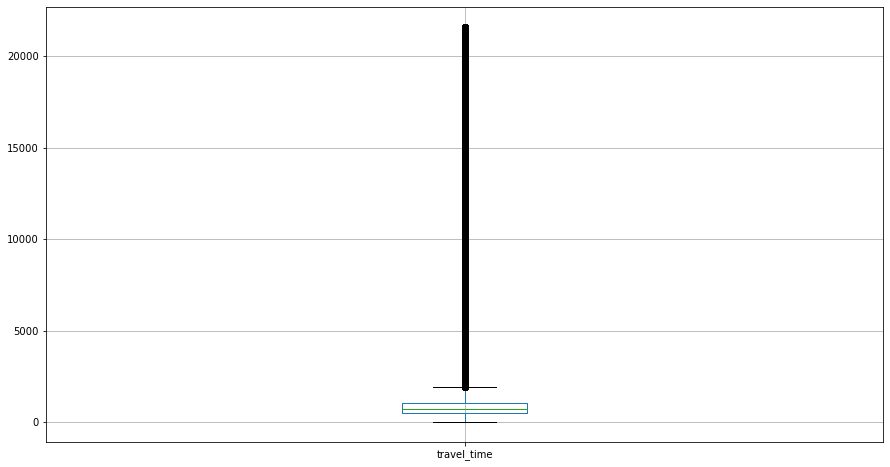

In [76]:
iti[['travel_time']].boxplot(figsize=(15, 8));

In [77]:
stats = iti[['travel_time']].describe().T
stats['IQR']=stats['75%']-stats['25%']

In [78]:
stats 

,count,mean,std,min,25%,50%,75%,max,IQR
travel_time,3771091.0,934.934586,1056.977305,1.0,497.0,738.0,1067.0,21600.0,570.0


In [79]:
cutoff=1.5 * stats['IQR'][0]

lower=stats['25%'][0] - cutoff
upper=stats['75%'][0] + cutoff

#res=df[(df[c] < lower) | (df[c] > upper)].copy()
cutoff, lower, upper

(855.0, -358.0, 1922.0)

In [80]:
iti[(iti.travel_time > 1922)].shape

(186687, 11)

In [30]:
# el test de tukey me dice que todo lo que sea por encima de 1922s (32min) es outliers, quitarímos 186690 registros

In [81]:
iti.shape

(3771091, 11)

In [82]:
iti[(iti.travel_time > 3600)].shape

(63927, 11)

In [83]:
iti[(iti.travel_time < 120)].shape

(10805, 11)

In [34]:
#me quedo con los trayectos mayores de 2min y menores de 1h

In [84]:
iti = iti[(iti.travel_time >= 120) & (iti.travel_time <= 3600)]

In [85]:
iti.shape

(3696359, 11)

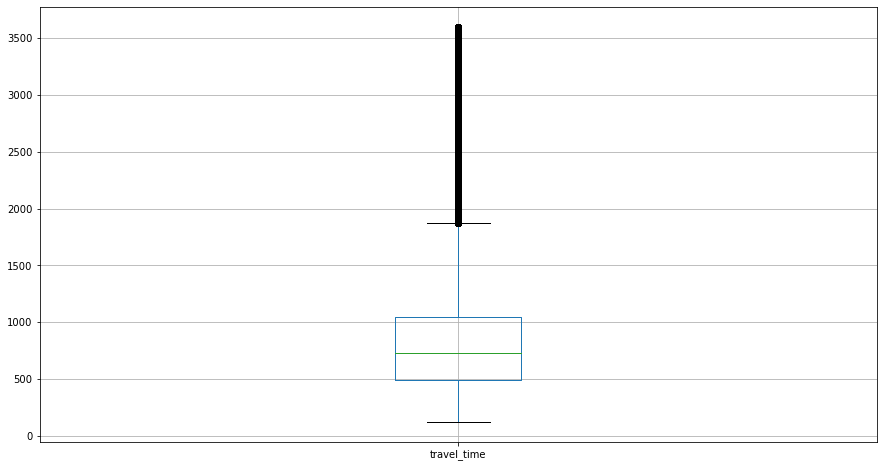

In [86]:
iti[['travel_time']].boxplot(figsize=(15, 8));

In [87]:
iti['dia_mes_año'] = pd.to_datetime(iti['unplug_hourTime']).dt.to_period('D')
iti['mes_año'] = pd.to_datetime(iti['unplug_hourTime']).dt.to_period('M')
iti['año'] = pd.DatetimeIndex(iti['unplug_hourTime']).year
iti['mes'] = pd.DatetimeIndex(iti['unplug_hourTime']).month
iti['dia'] = pd.to_datetime(iti['unplug_hourTime']).dt.day_name()
iti['hora'] = pd.to_datetime(iti['unplug_hourTime']).dt.hour


C:\Users\aaron\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\aaron\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [88]:
iti.tail()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code,dia_mes_año,mes_año,año,mes,dia,hora
7159880,60e3812c1b9131285030f696,36d40b49fafe4e7f41919089b609debf52f1ee42f3e752...,14,1,20,841,132,5,265,2021-06-30T23:00:00Z,28020,2021-06-30,2021-06,2021,6,Wednesday,23
7159881,60e381341b9131285030fefb,04ea09adba4c3e5e9e9142362b0fca2187530f31834001...,23,1,9,1480,182,5,265,2021-06-30T21:00:00Z,28005,2021-06-30,2021-06,2021,6,Wednesday,21
7159882,60e381351b9131285030ff15,d26c47762f73fbdca3fefb34830f72f2df1538f9926c73...,22,1,3,762,15,5,265,2021-06-29T18:00:00Z,28791,2021-06-29,2021-06,2021,6,Tuesday,18
7159886,60e4d2a51b91313ed4f52e62,45de608bddfda3f468ef6093c65f6246a2917ce2376e98...,23,1,3,746,234,0,84,2021-06-27T19:00:00Z,NaN,2021-06-27,2021-06,2021,6,Sunday,19
7159890,60e624111b91312da4ce3af2,0308fa6e55742306ac8cf3d5b4d1320d6100208d4a60db...,3,1,3,664,48,5,59,2021-06-29T13:00:00Z,28007,2021-06-29,2021-06,2021,6,Tuesday,13


In [89]:
iti['weekend'] = iti['dia'].apply(lambda x: 1 if x in ['Sunday', 'Saturday'] else 0)

In [90]:
iti = iti.drop(['zip_code'], axis = 1)

In [91]:
iti['tiempo'] = iti['travel_time'].apply(lambda x: int(x/60))

In [92]:
iti[(iti.hora >= 0) & (iti.hora <= 30)].head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,dia_mes_año,mes_año,año,mes,dia,hora,weekend,tiempo
3106671,5f024d791b913148f0c5edbf,cafafe19422232e54824992f88e4130ce79e0be3dbc950...,14,1,18,364,169,0,149,2020-07-01T00:00:00Z,2020-07-01,2020-07,2020,7,Wednesday,0,0,6
3106672,5f024d791b913148f0c5edc2,65840c389f151ecd831c3e713702db59f87af359d4aafa...,18,1,18,300,92,0,166,2020-07-01T00:00:00Z,2020-07-01,2020-07,2020,7,Wednesday,0,0,5
3106673,5f024d791b913148f0c5edc6,3970b96213e9f2a02ca7ffb991840c20dff1d531c2bf51...,13,1,19,383,49,0,128,2020-07-01T00:00:00Z,2020-07-01,2020-07,2020,7,Wednesday,0,0,6
3106674,5f024d791b913148f0c5edc9,57835e7ffe00d64403b1ae95b6d66db22f4ced98f0393f...,13,1,24,418,18,0,122,2020-07-01T00:00:00Z,2020-07-01,2020-07,2020,7,Wednesday,0,0,6
3106675,5f024d791b913148f0c5edca,c3c4cdc1eafed3699ad8114011ba7bd25505fc1eafe386...,3,1,16,263,183,5,185,2020-07-01T00:00:00Z,2020-07-01,2020-07,2020,7,Wednesday,0,0,4


In [93]:
iti.to_csv(r'..\data\iti.csv', index=False)  

In [ ]:
iti = pd.read_csv(r'..\data\iti.csv')

In [ ]:
iti = pd.read_csv(r'..\data\iti.csv')

In [ ]:
iti.head()

In [ ]:
iti.head()

In [47]:
c1 = iti[['dia_mes_año','año','mes','mes_año','dia','hora','weekend','idunplug_station', 'travel_time']]\
        .groupby(['dia_mes_año','dia','weekend','mes','año','mes_año','hora'])\
        .agg({'idunplug_station': 'count', 'travel_time': 'mean'}).reset_index()

In [48]:
c1.head(100)

,dia_mes_año,dia,weekend,mes,año,mes_año,hora,idunplug_station,travel_time
0,2020-07-01,Wednesday,0,7,2020,2020-07,0,145,850.634483
1,2020-07-01,Wednesday,0,7,2020,2020-07,1,63,863.952381
2,2020-07-01,Wednesday,0,7,2020,2020-07,2,37,826.567568
3,2020-07-01,Wednesday,0,7,2020,2020-07,3,42,735.476190
4,2020-07-01,Wednesday,0,7,2020,2020-07,4,137,700.343066
...,...,...,...,...,...,...,...,...,...
95,2020-07-04,Saturday,1,7,2020,2020-07,23,455,828.094505
96,2020-07-05,Sunday,1,7,2020,2020-07,0,440,876.497727
97,2020-07-05,Sunday,1,7,2020,2020-07,1,249,807.248996
98,2020-07-05,Sunday,1,7,2020,2020-07,2,170,789.223529


In [ ]:
estatic.latitude.unique()

In [ ]:
itiner['idunplug_station'].unique()

In [ ]:
estaciones.plot()

In [ ]:
z = estaciones[['id','total_bases']].groupby(['id','total_bases']).count().reset_index().groupby('id').count()

z[z['total_bases'] > 1]

In [ ]:
len(estatic['number'].unique())

In [ ]:
estaciones

In [45]:
i = itiner[['idunplug_station', 'idplug_station']].groupby(['idunplug_station', 'idplug_station']).count().reset_index()

,idunplug_station,idplug_station
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
67175,2009,266
67176,2009,267
67177,2009,269
67178,2009,270


In [ ]:
e.set_index('id').join(i.set_index('idunplug_station'), how = 'outer')

In [ ]:
x = e.set_index('id').join(i.set_index('idunplug_station'), how = 'outer').isna()
x[x.number == True]

In [11]:
bar_est = pd.read_csv(r'../data/bar_est.csv')

In [4]:
estatic = pd.read_csv('..\data\estatic.csv')

C:\Users\aaron\AppData\Local\Temp\ipykernel_12564\3709488900.py:1: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  estatic = pd.read_csv('..\data\estatic.csv')


In [13]:
est_centro = bar_est[bar_est.NOMDIS == 'Centro']

In [17]:
l_esta = list(est_centro['id'])

,_id,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,id
0,2019-07-01T00:29:26.018083,1,Puerta del Sol A,0,2,24,15,1a,-3.702425,0,Puerta del Sol nº 1,40.416896,8,1
1,2019-07-01T00:29:26.018083,1,Puerta del Sol B,0,2,24,14,1b,-3.702421,0,Puerta del Sol nº 1,40.417001,9,2
2,2019-07-01T00:29:26.018083,1,Miguel Moya,0,2,24,12,2,-3.705842,0,Calle Miguel Moya nº 1,40.420589,10,3
4,2019-07-01T00:29:26.018083,1,Malasaña,0,0,24,17,4,-3.702587,0,Calle Manuela Malasaña nº 5,40.428552,3,5
5,2019-07-01T00:29:26.018083,1,Fuencarral,0,0,27,19,5,-3.70206,0,Calle Fuencarral nº 108,40.428528,4,6
6,2019-07-01T00:29:26.018083,1,Colegio Arquitectos,0,0,24,21,6,-3.698447,0,Calle Hortaleza nº 63,40.424148,3,7
7,2019-07-01T00:29:26.018083,1,Hortaleza,0,2,21,13,7,-3.697771,0,Calle Hortaleza nº 75,40.425191,6,8
9,2019-07-01T00:29:26.018083,1,Plaza de San Miguel,1,2,24,10,9,-3.709508,0,Plaza de San Miguel nº 9,40.415606,9,10
10,2019-07-01T00:29:26.018083,1,Marqués de la Ensenada,0,0,24,22,10,-3.691881,0,Calle Marqués de la Ensenada nº 16,40.425086,2,11
11,2019-07-01T00:29:26.018083,1,San Andrés,0,0,24,18,11,-3.703592,0,Calle San Andrés nº 18,40.426948,6,12


In [ ]:
estacionex = gpd.read_file(r'..\data\geo_data\estaciones.geojson')

In [102]:
barrios = gpd.read_file(r'..\data\geo_data\Barrios\Barrios.shp')

In [103]:
barrios = barrios.to_crs(4326)

In [104]:
barrios.head()

,OBJECTID,CODDIS,NOMDIS,COD_BAR,NOMBRE,Shape_Leng,COD_DIS_TX,BARRIO_MAY,COD_DISBAR,NUM_BAR,BARRIO_MT,COD_DISB,Shape_STAr,Shape_STLe,geometry
0,132,17,Villaverde,172,San Cristóbal,4752.827446,17,SAN CRISTOBAL,172,2,SAN CRISTÓBAL,17-2,1.082492e+06,4752.827446,"POLYGON ((-3.68379 40.35021, -3.68379 40.34888..."
1,133,17,Villaverde,173,Butarque,12641.916858,17,BUTARQUE,173,3,BUTARQUE,17-3,6.375522e+06,12641.916858,"POLYGON ((-3.65751 40.32893, -3.65991 40.32786..."
2,134,17,Villaverde,175,Ángeles,5703.998815,17,ANGELES,175,5,ÁNGELES,17-5,1.935271e+06,5703.998815,"POLYGON ((-3.69297 40.34585, -3.69339 40.34579..."
3,135,17,Villaverde,174,Los Rosales,5470.262628,17,LOS ROSALES,174,4,LOS ROSALES,17-4,1.540747e+06,5470.262628,"POLYGON ((-3.68192 40.36130, -3.68152 40.36022..."
4,136,17,Villaverde,171,Villaverde Alto - Casco Histórico de Villaverde,13726.660503,17,VILLAVERDE ALTO - CASCO HISTORICO DE VILLAVERDE,171,1,VILLAVERDE ALTO - CASCO HISTÓRICO DE VILLAVERDE,17-1,9.253554e+06,13726.660503,"POLYGON ((-3.70515 40.36368, -3.70606 40.35983..."


In [105]:
barrios.to_csv(r'..\data\barrios.csv', index = False)

In [ ]:
barrios.info()

In [107]:
barrios.to_file(r'..\data\geo_data\barrios.geojson', driver="GeoJSON") 

In [ ]:
barrios[~barrios['CODDIS'].isin(['8','18','17'])]

In [ ]:
barrios.plot()

In [ ]:
[~barrios['CODDIS'].isin(['8','18','17'])]

In [ ]:
ax = barrios.plot(
    color='white', edgecolor='black', figsize = (20,12))

estacionex.plot(ax=ax, color='red')

plt.show()

In [ ]:
estacionex 

In [ ]:
barrios.head()

In [ ]:
#join_left_df = estacionex.sjoin(barrios, how="left")